In [149]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
import os
import re
import pandas as pd
import plotly.express as px
import spacy 
import numpy as np
import inflect
from collections import OrderedDict
os.chdir("/content/drive/My Drive/NLP")
!ls

 demofile2.txt		    'moby dic.txt'	   Uly.txt
'moby dic_clean.txt'	     Uly_clean.txt
'moby dic_final_clean.txt'   Uly_final_clean.txt


In [151]:
import nltk,re, pprint
from nltk import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer

nltk.download('brown')
nltk.download('tagsets') 
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [152]:
# Moby Dick or The Whale, Novel by Herman Melville

f = open('moby dic.txt')
t1 = f.read()

In [153]:
#lets first look at what we have read
t1[:500] #print first 500 character

'\ufeff\nThe Project Gutenberg EBook of Moby Dick; or The Whale, by Herman\nMelville\n\nThis eBook is for the use of anyone anywhere at no cost and with almost\nno restrictions whatsoever.  You may copy it, give it away or re-use it\nunder the terms of the Project Gutenberg License included with this\neBook or online at www.gutenberg.org\n\n\nTitle: Moby Dick; or The Whale\n\nAuthor: Herman Melville\n\nRelease Date: December 25, 2008 [EBook #2701] Last Updated: December 3,\n2017\n\nLanguage: English\n\nCharacter set enc'

In [154]:
#since the data is not clean, manually removing thing such as table of contents and also the last section of license by Guenberg 

In [155]:
#lets see how the new data looks like
f = open('moby dic_clean.txt')
t1 = f.read()
t1[:500]

'\ufeff\nCHAPTER 1. Loomings.\n\nCall me Ishmael. Some years ago—never mind how long precisely—having\nlittle or no money in my purse, and nothing particular to interest me\non shore, I thought I would sail about a little and see the watery part\nof the world. It is a way I have of driving off the spleen and\nregulating the circulation. Whenever I find myself growing grim about\nthe mouth; whenever it is a damp, drizzly November in my soul; whenever\nI find myself involuntarily pausing before coffin warehouses'

In [156]:
#better but we would like to delete all the chapter titles and so on
#but lets first find them

chapter = re.findall(r'CHAPTER \d+. [\w| ]+',t1)
print(len(chapter))
print(chapter[:10])

135
['CHAPTER 1. Loomings', 'CHAPTER 2. The Carpet', 'CHAPTER 3. The Spouter', 'CHAPTER 4. The Counterpane', 'CHAPTER 5. Breakfast', 'CHAPTER 6. The Street', 'CHAPTER 7. The Chapel', 'CHAPTER 8. The Pulpit', 'CHAPTER 9. The Sermon', 'CHAPTER 10. A Bosom Friend']


In [157]:
#since we know there are 135 chapters in moby dick, our regex is working
#now lets remove them
t1 = re.sub(r'CHAPTER \d+. [\w| ]+','',t1) 

In [158]:
#now lets see that chapter names are removed or not
t1[:500]

'\ufeff\n.\n\nCall me Ishmael. Some years ago—never mind how long precisely—having\nlittle or no money in my purse, and nothing particular to interest me\non shore, I thought I would sail about a little and see the watery part\nof the world. It is a way I have of driving off the spleen and\nregulating the circulation. Whenever I find myself growing grim about\nthe mouth; whenever it is a damp, drizzly November in my soul; whenever\nI find myself involuntarily pausing before coffin warehouses, and\nbringing up t'

In [159]:
special = re.findall(r'\w+[^a-zA-z ]+\w+',t1)
print(special[:10])
special = re.findall(r"\w+\n\w+",t1)
print(special[:10])
special = re.findall(r"[^0-9a-zA-Z]+",t1)
print(special[:10])


['ago—never', 'precisely—having', 'me\non', 'part\nof', 'and\nregulating', 'about\nthe', 'whenever\nI', 'and\nbringing', 'whenever\nmy', 'moral\nprinciple']
['having\nlittle', 'me\non', 'part\nof', 'and\nregulating', 'about\nthe', 'whenever\nI', 'and\nbringing', 'whenever\nmy', 'moral\nprinciple', 'and\nmethodically']
['\ufeff\n.\n\n', ' ', ' ', '. ', ' ', ' ', '—', ' ', ' ', ' ']


In [160]:
#now we would like to split the words with \n with a space
t1 = re.sub(r'\n',' ',t1) 
t1[:500]

'\ufeff .  Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world. It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up t'

In [161]:
special = re.findall(r'\ufeff .',t1)
print(special)


['\ufeff .']


In [162]:
t1 = re.sub(r'\ufeff .','',t1)
t1[:500]

'  Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world. It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the '

In [163]:
# now lets load our second book
f = open('Uly.txt')
t2 = f.read()
t2[:500]

'\ufeff\nThe Project Gutenberg EBook of Ulysses, by James Joyce\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever. You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Ulysses\n\nAuthor: James Joyce\n\nRelease Date: August 1, 2008 [EBook #4300]\nLast Updated: December 27, 2019\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUT'

In [164]:
#since the data is not clean, manually removing thing such as table of contents and also the last section of license by Guenberg 
#lets see how the new data looks like
f = open('Uly_clean.txt')
t2 = f.read()
t2[:500]

'\ufeff\n— I —\n\n\n[ 1 ]\n\nStately, plump Buck Mulligan came from the stairhead, bearing a bowl of\nlather on which a mirror and a razor lay crossed. A yellow\ndressinggown, ungirdled, was sustained gently behind him on the mild\nmorning air. He held the bowl aloft and intoned:\n\n—_Introibo ad altare Dei_.\n\nHalted, he peered down the dark winding stairs and called out coarsely:\n\n—Come up, Kinch! Come up, you fearful jesuit!\n\nSolemnly he came forward and mounted the round gunrest. He faced about\nand blessed gr'

In [165]:
#better but we would like to delete all the chapter 1 and so on
#but lets first find them

chapter2 = re.findall(r'\[ \d+ \]',t2)
print(len(chapter2))
print(chapter2[:10])

18
['[ 1 ]', '[ 2 ]', '[ 3 ]', '[ 4 ]', '[ 5 ]', '[ 6 ]', '[ 7 ]', '[ 8 ]', '[ 9 ]', '[ 10 ]']


In [166]:
t2 = re.sub(r'\[ \d+ \]',"",t2)
t2[:250] 

'\ufeff\n— I —\n\n\n\n\nStately, plump Buck Mulligan came from the stairhead, bearing a bowl of\nlather on which a mirror and a razor lay crossed. A yellow\ndressinggown, ungirdled, was sustained gently behind him on the mild\nmorning air. He held the bowl aloft an'

In [167]:
#now we would like to split the words with \n with a space
t2 = re.sub(r'\n',' ',t2) 
t2[:500]

'\ufeff — I —     Stately, plump Buck Mulligan came from the stairhead, bearing a bowl of lather on which a mirror and a razor lay crossed. A yellow dressinggown, ungirdled, was sustained gently behind him on the mild morning air. He held the bowl aloft and intoned:  —_Introibo ad altare Dei_.  Halted, he peered down the dark winding stairs and called out coarsely:  —Come up, Kinch! Come up, you fearful jesuit!  Solemnly he came forward and mounted the round gunrest. He faced about and blessed gravely'

In [168]:
t2 = re.sub(r'[  ]+',' ',t2) 
t2[:500]

'\ufeff — I — Stately, plump Buck Mulligan came from the stairhead, bearing a bowl of lather on which a mirror and a razor lay crossed. A yellow dressinggown, ungirdled, was sustained gently behind him on the mild morning air. He held the bowl aloft and intoned: —_Introibo ad altare Dei_. Halted, he peered down the dark winding stairs and called out coarsely: —Come up, Kinch! Come up, you fearful jesuit! Solemnly he came forward and mounted the round gunrest. He faced about and blessed gravely thrice '

In [169]:
special = re.findall(r'\w+[^a-zA-z ]+\w+',t2)
print(special[:10])
special = re.findall(r"\w+\n\w+",t2)
print(special[:10])
special = re.findall(r"[^0-9a-zA-Z]+",t2)
print(special[:10])

['preacher’s', 'Mulligan’s', 'hasn’t', 'isn’t', 'you’re', 'can’t', 'knife-blade', 'don’t', 'I’m', 'Stephen’s']
[]
['\ufeff — ', ' — ', ', ', ' ', ' ', ' ', ' ', ' ', ' ', ', ']


In [170]:
#now we would like to split the words with special characters with a space
t2 = re.sub(r'\ufeff — ','',t2) 
t2[:500]

'I — Stately, plump Buck Mulligan came from the stairhead, bearing a bowl of lather on which a mirror and a razor lay crossed. A yellow dressinggown, ungirdled, was sustained gently behind him on the mild morning air. He held the bowl aloft and intoned: —_Introibo ad altare Dei_. Halted, he peered down the dark winding stairs and called out coarsely: —Come up, Kinch! Come up, you fearful jesuit! Solemnly he came forward and mounted the round gunrest. He faced about and blessed gravely thrice the '

In [171]:
#lets calculate the total tokens(number of words) of each book
token_t1=word_tokenize(t1)
token_t2=word_tokenize(t2)
print(len(token_t1))
print("- Moby Dick\n")
print(len(token_t2))
print("- Ulysses\n")

249652
- Moby Dick

322802
- Ulysses



In [172]:
#vocabulary of each book
vocab1 = list(set(token_t1))
print(len(vocab1))
print("- Moby Dick\n")
vocab2 = list(set(token_t2))
print(len(vocab2))
print("- Ulysses\n")

21171
- Moby Dick

35020
- Ulysses



In [173]:
#tagging t1 using penn treebank tagger
tag1 = pos_tag(token_t1)
tag2 = pos_tag(token_t2)

In [174]:
tag1[:20]

[('Call', 'VB'),
 ('me', 'PRP'),
 ('Ishmael', 'NNP'),
 ('.', '.'),
 ('Some', 'DT'),
 ('years', 'NNS'),
 ('ago—never', 'RB'),
 ('mind', 'VB'),
 ('how', 'WRB'),
 ('long', 'JJ'),
 ('precisely—having', 'JJ'),
 ('little', 'JJ'),
 ('or', 'CC'),
 ('no', 'DT'),
 ('money', 'NN'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('purse', 'NN'),
 (',', ','),
 ('and', 'CC')]

In [175]:
tag2[:20]

[('I', 'PRP'),
 ('—', 'VBP'),
 ('Stately', 'RB'),
 (',', ','),
 ('plump', 'JJ'),
 ('Buck', 'NNP'),
 ('Mulligan', 'NNP'),
 ('came', 'VBD'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('stairhead', 'NN'),
 (',', ','),
 ('bearing', 'VBG'),
 ('a', 'DT'),
 ('bowl', 'NN'),
 ('of', 'IN'),
 ('lather', 'NN'),
 ('on', 'IN'),
 ('which', 'WDT'),
 ('a', 'DT')]

In [176]:
tag_fd1 = nltk.FreqDist(tag for (word, tag) in tag1)
tag_fd2 = nltk.FreqDist(tag for (word, tag) in tag2)

In [177]:
tag_fd1.most_common(5)

[('NN', 34434), ('IN', 28202), ('DT', 25060), ('JJ', 18967), (',', 18924)]

In [178]:
tag_fd2.most_common(5)

[('NN', 51156), ('IN', 32332), ('NNP', 27268), ('DT', 26074), ('.', 23712)]

In [179]:
dic1 = dict(tag_fd1)

Text(0.5, 1.0, 'Top 10 POS tags of Moby Dick')

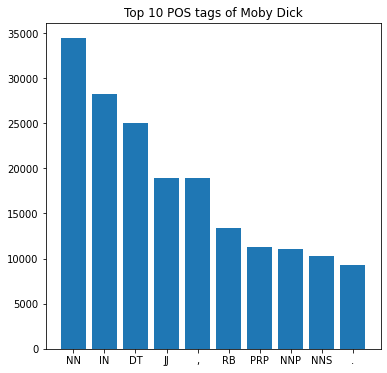

In [180]:
list1 =sorted(dic1.items(), key=lambda x: x[1], reverse=True)

x=list(map(lambda x: x[0], list1))
y=list(map(lambda x: x[1], list1))
plt.figure(figsize = (6, 6), facecolor = None) 
plt.bar(x[:10],y[:10])
plt.title("Top 10 POS tags of Moby Dick")

Text(0.5, 1.0, 'Top 10 POS tags of Ulysses')

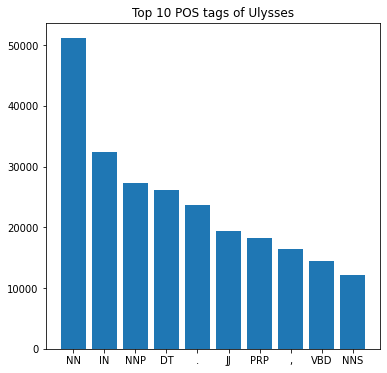

In [181]:
dic2 = dict(tag_fd2)
list2 =sorted(dic2.items(), key=lambda x: x[1], reverse=True)

x=list(map(lambda x: x[0], list2))
y=list(map(lambda x: x[1], list2))
plt.figure(figsize = (6, 6), facecolor = None) 
plt.bar(x[:10],y[:10])
plt.title("Top 10 POS tags of Ulysses")

# **Project Round- 2**
**Part - 1**




In [182]:
from nltk.corpus import wordnet as wn
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [183]:
#All the noun and verb tags are included in the noun set and verb set respectively
nn_set = ['NN','NNS','NNP','NNPS']
vb_set = ['VB','VBD','VBG','VBN','VBP','VBZ']

In [184]:
#searching for words tagged with elements of set of nouns and verbs
tag1_nn = [tag for tag in tag1 if tag[1] in nn_set] 
tag1_vb = [tag for tag in tag1 if tag[1] in vb_set]
print(tag1_nn[:10])
print(tag1_vb[:10])
#counting the total number of nouns and verbs
noun_num1=len(tag1_nn)
verb_num1=len(tag1_vb)
data1 = [['Nouns', noun_num1], ['Verbs', verb_num1]]
df1 = pd.DataFrame(data1, columns = ['category', 'count'])
print(noun_num1)
print(verb_num1)     

[('Ishmael', 'NNP'), ('years', 'NNS'), ('money', 'NN'), ('purse', 'NN'), ('nothing', 'NN'), ('interest', 'NN'), ('shore', 'NN'), ('part', 'NN'), ('world', 'NN'), ('way', 'NN')]
[('Call', 'VB'), ('mind', 'VB'), ('thought', 'VBD'), ('sail', 'VB'), ('see', 'VB'), ('is', 'VBZ'), ('have', 'VBP'), ('driving', 'VBG'), ('regulating', 'VBG'), ('find', 'VBP')]
55829
33974


In [185]:
#plotting graph for number of nouns and verbs(We are using plotly express to plot the graphs)
fig = px.bar(df1, x="category",y="count", color='category')
fig.show()

In [186]:
#searching for words tagged with elements of set of nouns and verbs
tag2_nn = [tag for tag in tag2 if tag[1] in nn_set] 
tag2_vb = [tag for tag in tag2 if tag[1] in vb_set]
print(tag2_nn[:10])
print(tag2_vb[:10])
#counting the total number of nouns and verbs
noun_num2=len(tag2_nn)
verb_num2=len(tag2_vb)
data2 = [['Nouns', noun_num2], ['Verbs', verb_num2]]
df2 = pd.DataFrame(data2, columns = ['category', 'count'])
print(noun_num2)
print(verb_num2)   

[('Buck', 'NNP'), ('Mulligan', 'NNP'), ('stairhead', 'NN'), ('bowl', 'NN'), ('lather', 'NN'), ('mirror', 'NN'), ('razor', 'NN'), ('lay', 'NN'), ('dressinggown', 'NN'), ('morning', 'NN')]
[('—', 'VBP'), ('came', 'VBD'), ('bearing', 'VBG'), ('crossed', 'VBN'), ('was', 'VBD'), ('sustained', 'VBN'), ('held', 'VBD'), ('peered', 'VBD'), ('winding', 'VBG'), ('called', 'VBD')]
90724
43822


In [187]:
#plotting graph for number of nouns and verbs(We are using plotly express to plot the graphs)
fig = px.bar(df2, x="category",y="count", color='category')
fig.show()

In [188]:
!pip install pywsd
!pip install -U wn==0.0.23

Requirement already up-to-date: wn==0.0.23 in /usr/local/lib/python3.6/dist-packages (0.0.23)


Book-1

In [240]:
#making a list of sentences from book1
sentence_list1 = nltk.sent_tokenize(t1)

print(sentence_list1[:5])

['  Call me Ishmael.', 'Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.', 'It is a way I have of driving off the spleen and regulating the circulation.', 'Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people’s hats off—then, I account it high time to get to sea as soon as I can.', 'This is my substitute for pistol and ball.']


In [190]:
#disambiguation of word senses is performed
from pywsd import disambiguate

disambiguated_list1 = []
for s in sentence_list1:
  disambiguated_list1.append(disambiguate(s))

In [191]:
print(disambiguated_list1[:5])

[[('Call', Synset('visit.v.03')), ('me', None), ('Ishmael', Synset('outcast.n.01')), ('.', None)], [('Some', None), ('years', Synset('year.n.02')), ('ago—never', None), ('mind', Synset('take_care.v.02')), ('how', None), ('long', Synset('retentive.a.01')), ('precisely—having', None), ('little', Synset('little.a.02')), ('or', None), ('no', None), ('money', Synset('money.n.03')), ('in', None), ('my', None), ('purse', Synset('purse.n.04')), (',', None), ('and', None), ('nothing', Synset('nothing.n.01')), ('particular', Synset('particular.s.04')), ('to', None), ('interest', Synset('interest.n.05')), ('me', None), ('on', None), ('shore', Synset('shore.n.02')), (',', None), ('I', None), ('thought', Synset('think.v.11')), ('I', None), ('would', None), ('sail', Synset('voyage.v.01')), ('about', None), ('a', None), ('little', Synset('little.a.02')), ('and', None), ('see', Synset('watch.v.03')), ('the', None), ('watery', Synset('watery.s.04')), ('part', Synset('share.n.01')), ('of', None), ('the'

In [192]:
ln1 = []                                  #storing the lexnames in a list
for s in disambiguated_list1:
  for w in s:
    if type(w[1])==type(None):
      continue
    ln1.append((w[0],w[1].lexname()))

In [193]:
print(ln1[:10])

[('Call', 'verb.social'), ('Ishmael', 'noun.person'), ('years', 'noun.time'), ('mind', 'verb.social'), ('long', 'adj.all'), ('little', 'adj.all'), ('money', 'noun.possession'), ('purse', 'noun.possession'), ('nothing', 'noun.quantity'), ('particular', 'adj.all')]


In [194]:
#counting the total noun and verb types
noun_category_count1 = {}
verb_category_count1 = {}

for w in ln1:
  if w[1][0]=='n':
    noun_category_count1[w[1]] = noun_category_count1.get(w[1],0) + 1
  elif w[1][0]=='v':
    verb_category_count1[w[1]] = verb_category_count1.get(w[1],0) + 1

print("The categories of nouns = ", len(noun_category_count1))
print("The categories of verbs = ", len(verb_category_count1))

The categories of nouns =  26
The categories of verbs =  15


In [195]:
#the count of each category of nouns in book1
category_dict_noun1 = {}
for category in noun_category_count1.keys():
  category_dict_noun1[category] = noun_category_count1[category]

category_df_noun1 = pd.DataFrame.from_dict(category_dict_noun1, orient='index', columns=['count'])
category_df_noun1['category'] = category_df_noun1.index
category_df_noun1.index = range(len(category_df_noun1))
category_df_noun1

,count,category
0,6145,noun.person
1,1673,noun.time
2,520,noun.possession
3,1626,noun.quantity
4,8044,noun.artifact
5,1339,noun.object
6,1214,noun.body
7,3382,noun.act
8,5658,noun.communication
9,1214,noun.state


In [196]:
#plot of count of each category of noun in book1
df = category_df_noun1
fig = px.bar(df, x="category",y="count", color='category')
fig.show()

In [197]:
#count of each category of verb in book1
category_dict_verb1 = {}
for category in verb_category_count1.keys():
  category_dict_verb1[category] = verb_category_count1[category]

category_df_verb1 = pd.DataFrame.from_dict(category_dict_verb1, orient='index', columns=['count'])
category_df_verb1['category'] = category_df_verb1.index
category_df_verb1.index = range(len(category_df_verb1))
category_df_verb1

,count,category
0,1468,verb.social
1,1936,verb.cognition
2,3168,verb.motion
3,1811,verb.perception
4,1068,verb.possession
5,2359,verb.change
6,3214,verb.communication
7,2970,verb.contact
8,730,verb.emotion
9,801,verb.creation


In [198]:
#plot of count of each category of verb in book1
df = category_df_verb1
fig = px.bar(df, x="category",y="count", color='category')
fig.show()

Book-2

In [241]:
#making a list of sentences from book2
sentence_list2 = nltk.sent_tokenize(t2)

print(sentence_list2[:5])

['I — Stately, plump Buck Mulligan came from the stairhead, bearing a bowl of lather on which a mirror and a razor lay crossed.', 'A yellow dressinggown, ungirdled, was sustained gently behind him on the mild morning air.', 'He held the bowl aloft and intoned: —_Introibo ad altare Dei_.', 'Halted, he peered down the dark winding stairs and called out coarsely: —Come up, Kinch!', 'Come up, you fearful jesuit!']


In [200]:
#disambiguation of word senses is performed
from pywsd import disambiguate

disambiguated_list2 = []
for s in sentence_list2:
  disambiguated_list2.append(disambiguate(s))

In [201]:
print(disambiguated_list2[:5])

[[('I', None), ('—', None), ('Stately', Synset('stately.s.02')), (',', None), ('plump', Synset('chubby.s.01')), ('Buck', Synset('vaulting_horse.n.01')), ('Mulligan', Synset('mulligan_stew.n.01')), ('came', Synset('total.v.01')), ('from', None), ('the', None), ('stairhead', Synset('stairhead.n.01')), (',', None), ('bearing', Synset('yield.v.10')), ('a', None), ('bowl', Synset('stadium.n.01')), ('of', None), ('lather', Synset('soapsuds.n.01')), ('on', None), ('which', None), ('a', None), ('mirror', Synset('mirror.n.02')), ('and', None), ('a', None), ('razor', Synset('razor.n.01')), ('lay', Synset('ballad.n.02')), ('crossed', Synset('traverse.v.01')), ('.', None)], [('A', None), ('yellow', Synset('yellow.s.05')), ('dressinggown', None), (',', None), ('ungirdled', None), (',', None), ('was', None), ('sustained', Synset('sustain.v.06')), ('gently', Synset('lightly.r.03')), ('behind', Synset('buttocks.n.01')), ('him', None), ('on', None), ('the', None), ('mild', Synset('mild.a.01')), ('morni

In [202]:
ln2 = []                                     #storing the lexnames in a list
for s in disambiguated_list2:
  for w in s:
    if type(w[1])==type(None):
      continue
    ln2.append((w[0],w[1].lexname()))

In [203]:
print(ln2[:10])

[('Stately', 'adj.all'), ('plump', 'adj.all'), ('Buck', 'noun.artifact'), ('Mulligan', 'noun.food'), ('came', 'verb.stative'), ('stairhead', 'noun.artifact'), ('bearing', 'verb.possession'), ('bowl', 'noun.artifact'), ('lather', 'noun.object'), ('mirror', 'noun.cognition')]


In [204]:
#counting the total noun and verb types
noun_category_count2 = {}
verb_category_count2 = {}

for w in ln2:
  if w[1][0]=='n':
    noun_category_count2[w[1]] = noun_category_count2.get(w[1],0) + 1
  elif w[1][0]=='v':
    verb_category_count2[w[1]] = verb_category_count2.get(w[1],0) + 1

print("The categories of nouns = ", len(noun_category_count2))
print("The categories of verbs = ", len(verb_category_count2))

The categories of nouns =  26
The categories of verbs =  15


In [205]:
#count of each category of noun in book2
category_dict_noun2 = {}
for category in noun_category_count2.keys():
  category_dict_noun2[category] = noun_category_count2[category]

category_df_noun2 = pd.DataFrame.from_dict(category_dict_noun2, orient='index', columns=['count'])
category_df_noun2['category'] = category_df_noun2.index
category_df_noun2.index = range(len(category_df_noun2))
category_df_noun2

,count,category
0,10880,noun.artifact
1,1584,noun.food
2,1449,noun.object
3,3353,noun.cognition
4,10412,noun.communication
5,1597,noun.body
6,3454,noun.time
7,12173,noun.person
8,2857,noun.group
9,2044,noun.quantity


In [206]:
#plot of count of each category of noun in book2
df = category_df_noun2
fig = px.bar(df, x="category",y="count", color='category')
fig.show()

In [207]:
#count of each category of verb in book2
category_dict_verb2 = {}
for category in verb_category_count2.keys():
  category_dict_verb2[category] = verb_category_count2[category]

category_df_verb2 = pd.DataFrame.from_dict(category_dict_verb2, orient='index', columns=['count'])
category_df_verb2['category'] = category_df_verb2.index
category_df_verb2.index = range(len(category_df_verb2))
category_df_verb2

,count,category
0,2428,verb.stative
1,1665,verb.possession
2,3434,verb.motion
3,5739,verb.communication
4,3818,verb.contact
5,1744,verb.social
6,2008,verb.perception
7,2787,verb.change
8,633,verb.competition
9,1516,verb.body


In [208]:
#plot of count of each category of verb in book2
df = category_df_verb2
fig = px.bar(df, x="category",y="count", color='category')
fig.show()

**Part - 2** 
---
Book-1

In [209]:
#NER of book1 using spacy
entities1 = []
nlp = spacy.load('en_core_web_sm') 
for s in sentence_list1:
  doc = nlp(s) 
  for ent in doc.ents: 
    entities1.append([ent.text, ent.label_])

In [210]:
#words with their entity names
entities1[:10]

[['Ishmael', 'GPE'],
 ['Some years ago', 'DATE'],
 ['November', 'DATE'],
 ['Cato', 'ORG'],
 ['Manhattoes', 'ORG'],
 ['Indian', 'NORP'],
 ['a few hours', 'TIME'],
 ['Sabbath afternoon', 'TIME'],
 ['Corlears Hook to Coenties Slip', 'WORK_OF_ART'],
 ['Whitehall', 'PERSON']]

Book-2

In [211]:
#NER of book1 using spacy
entities2 = []
nlp = spacy.load('en_core_web_sm') 
for s in sentence_list2:
  doc = nlp(s) 
  for ent in doc.ents:
    entities2.append([ent.text, ent.label_])

In [212]:
#words with their entity names
entities2[:10]

[['Buck Mulligan', 'PERSON'],
 ['the mild morning air', 'TIME'],
 ['Dei_', 'PERSON'],
 ['Kinch', 'PERSON'],
 ['Stephen Dedalus', 'PERSON'],
 ['Stephen Dedalus', 'PERSON'],
 ['Buck Mulligan', 'PERSON'],
 ['Christine', 'PERSON'],
 ['One', 'CARDINAL'],
 ['Chrysostomos', 'ORG']]

In [213]:
df1 = pd.DataFrame(entities1, columns = ['text','label'], dtype=str)
df1

,text,label
0,Ishmael,GPE
1,Some years ago,DATE
2,November,DATE
3,Cato,ORG
4,Manhattoes,ORG
...,...,...
8289,three,CARDINAL
8290,almost one,CARDINAL
8291,night,TIME
8292,the second day,DATE


In [214]:
fig = px.histogram(df1, x="label",color='label')
fig.show()

In [215]:
df2 = pd.DataFrame(entities2, columns = ['text','label'], dtype=str)
df2

,text,label
0,Buck Mulligan,PERSON
1,the mild morning air,TIME
2,Dei_,PERSON
3,Kinch,PERSON
4,Stephen Dedalus,PERSON
...,...,...
15614,Alameda,GPE
15615,Gibraltar,ORG
15616,Andalusian,NORP
15617,Moorish,NORP


In [216]:
fig = px.histogram(df2, x="label", color='label')
fig.show()

In [217]:
#code to convert a passage into dataframe of entites and its labels
def ents_to_df(doc):
  df100 = pd.DataFrame(columns = ['Entity', 'Label']) 

  if doc.ents:
    for ent in doc.ents:
      df100 = df100.append({'Entity': ent.text, 'Label': ent.label_},ignore_index=True)
  return df100


In [218]:
passage1_book1 = "There was a circumstance which at first sight seemed to entangle his delirious but still methodical scheme. But not so in the reality, perhaps. Though the gregarious sperm whales have their regular seasons for particular grounds, yet in general you cannot conclude that the herds which haunted such and such a latitude or longitude this year, say, will turn out to be identically the same with those that were found there the preceding season; though there are peculiar and unquestionable instances where the contrary of this has proved true. In general, the same remark, only within a less wide limit, applies to the solitaries and hermits among the matured, aged sperm whales. So that though Moby Dick had in a former year been seen, for example, on what is called the Seychelle ground in the Indian ocean, or Volcano Bay on the Japanese Coast; yet it did not follow, that were the Pequod to visit either of those spots at any subsequent corresponding season, she would infallibly encounter him there. So, too, with some other feeding grounds, where he had at times revealed himself. But all these seemed only his casual stopping-places and ocean-inns, so to speak, not his places of prolonged abode. And where Ahab’s chances of accomplishing his object have hitherto been spoken of, allusion has only been made to whatever way-side, antecedent, extra prospects were his, ere a particular set time or place were attained, when all possibilities would become probabilities, and, as Ahab fondly thought, every possibility the next thing to a certainty. That particular set time and place were conjoined in the one technical phrase—the Season-on-the-Line. For there and then, for several consecutive years, Moby Dick had been periodically descried, lingering in those waters for awhile, as the sun, in its annual round, loiters for a predicted interval in any one sign of the Zodiac. There it was, too, that most of the deadly encounters with the white whale had taken place; there the waves were storied with his deeds; there also was that tragic spot where the monomaniac old man had found the awful motive to his vengeance. But in the cautious comprehensiveness and unloitering vigilance with which Ahab threw his brooding soul into this unfaltering hunt, he would not permit himself to rest all his hopes upon the one crowning fact above mentioned, however flattering it might be to those hopes; nor in the sleeplessness of his vow could he so tranquillize his unquiet heart as to postpone all intervening quest."
passage1_book1

'There was a circumstance which at first sight seemed to entangle his delirious but still methodical scheme. But not so in the reality, perhaps. Though the gregarious sperm whales have their regular seasons for particular grounds, yet in general you cannot conclude that the herds which haunted such and such a latitude or longitude this year, say, will turn out to be identically the same with those that were found there the preceding season; though there are peculiar and unquestionable instances where the contrary of this has proved true. In general, the same remark, only within a less wide limit, applies to the solitaries and hermits among the matured, aged sperm whales. So that though Moby Dick had in a former year been seen, for example, on what is called the Seychelle ground in the Indian ocean, or Volcano Bay on the Japanese Coast; yet it did not follow, that were the Pequod to visit either of those spots at any subsequent corresponding season, she would infallibly encounter him th

In [219]:
manually_passage1_book1_labels = [
                           ['first','ORDINAL'],
                           ['Ahab','PERSON'],
                           ['Ahab','PERSON'],
                           ['Ahab','PERSON'],
                           ['Moby Dick','PERSON'],
                           ['one','CARDINAL'],
                           ['one','CARDINAL'],
                           ['one','CARDINAL'],
                           ['Seychelle','LOC'],
                           ['the Japanese Coast','LOC'],
                           ['this year','DATE'],
                           ['several consecutive years','DATE'],
                           ['annual','DATE'],
                           ['Moby Dick','PERSON'],
                           ['sperm whales','ORG'],
                           ['the preceding season','DATE'],
                           ['Indian Ocean','LOC'],
                           ['Volcano Bay','LOC'],
                           ['Zodiac','FAC']


                    
]

manually_passage1_book1_df = pd.DataFrame(manually_passage1_book1_labels,columns=['Entity','Label'])
manually_passage1_book1_df

,Entity,Label
0,first,ORDINAL
1,Ahab,PERSON
2,Ahab,PERSON
3,Ahab,PERSON
4,Moby Dick,PERSON
5,one,CARDINAL
6,one,CARDINAL
7,one,CARDINAL
8,Seychelle,LOC
9,the Japanese Coast,LOC


In [220]:
entities = []
temp = nlp(passage1_book1)
df_passage11 = ents_to_df(temp)
df_passage11

,Entity,Label
0,first,ORDINAL
1,this year,DATE
2,the preceding season,DATE
3,Moby Dick,PERSON
4,Seychelle,PERSON
5,Indian,NORP
6,Volcano Bay,PERSON
7,the Japanese Coast,LOC
8,Pequod,FAC
9,Ahab,LOC


In [221]:
passage2_book1 = "It was just between daybreak and sunrise of the morning of the second day, when they were washing down the decks, that a stupid Teneriffe man, drawing water in the main-chains, all at once shouted out, ‘There she rolls! there she rolls!’ Jesu, what a whale! It was Moby Dick. “‘Moby Dick!’ cried Don Sebastian; ‘St. Dominic! Sir sailor, but do whales have christenings? Whom call you Moby Dick?’ “‘A very white, and famous, and most deadly immortal monster, Don;—but that would be too long a story.’ “‘How? how?’ cried all the young Spaniards, crowding."
passage2_book1

'It was just between daybreak and sunrise of the morning of the second day, when they were washing down the decks, that a stupid Teneriffe man, drawing water in the main-chains, all at once shouted out, ‘There she rolls! there she rolls!’ Jesu, what a whale! It was Moby Dick. “‘Moby Dick!’ cried Don Sebastian; ‘St. Dominic! Sir sailor, but do whales have christenings? Whom call you Moby Dick?’ “‘A very white, and famous, and most deadly immortal monster, Don;—but that would be too long a story.’ “‘How? how?’ cried all the young Spaniards, crowding.'

In [222]:
manually_passage2_book1_labels = [
                                  ['the morning of the second day','TIME'],
                                  ['Teneriffe','GPE'],
                                  ['Jesu','PERSON'],
                                  ['Moby Dick','PERSON'],
                                  ['Moby Dick','PERSON'],
                                  ['Don Sebastian','PERSON'],
                                  ['St. Dominic','PERSON'],
                                  ['Moby Dick','PERSON'],
                                  ['Don','PERSON'],
                                  ['Spaniards','NORP']
] 
manually_passage2_book1_df = pd.DataFrame(manually_passage2_book1_labels,columns=['Entity','Label'])
manually_passage2_book1_df

,Entity,Label
0,the morning of the second day,TIME
1,Teneriffe,GPE
2,Jesu,PERSON
3,Moby Dick,PERSON
4,Moby Dick,PERSON
5,Don Sebastian,PERSON
6,St. Dominic,PERSON
7,Moby Dick,PERSON
8,Don,PERSON
9,Spaniards,NORP


In [223]:
entities = []
temp = nlp(passage2_book1)
df_passage12 = ents_to_df(temp)
df_passage12

,Entity,Label
0,the morning of the second day,TIME
1,Jesu,PERSON
2,Moby Dick,PERSON
3,Moby Dick,PERSON
4,Don Sebastian,PERSON
5,St. Dominic,GPE
6,Moby Dick,PERSON
7,‘How? how?’ cried all the young,WORK_OF_ART
8,Spaniards,NORP


In [224]:
passage1_book2 = "Woodshadows floated silently by through the morning peace from the stairhead seaward where he gazed. Inshore and farther out the mirror of water whitened, spurned by lightshod hurrying feet. White breast of the dim sea. The twining stresses, two by two. A hand plucking the harpstrings, merging their twining chords. Wavewhite wedded words shimmering on the dim tide. A cloud began to cover the sun slowly, wholly, shadowing the bay in deeper green. It lay beneath him, a bowl of bitter waters. Fergus’ song: I sang it alone in the house, holding down the long dark chords. Her door was open: she wanted to hear my music. Silent with awe and pity I went to her bedside. She was crying in her wretched bed. For those words, Stephen: love’s bitter mystery. And putting on his stiff collar and rebellious tie he spoke to them, chiding them, and to his dangling watchchain. His hands plunged and rummaged in his trunk while he called for a clean handkerchief. God, we’ll simply have to dress the character. I want puce gloves and green boots. Contradiction. Do I contradict myself? Very well then, I contradict myself. Mercurial Malachi. A limp black missile flew out of his talking hands. He skipped off the gunrest and looked gravely at his watcher, gathering about his legs the loose folds of his gown. The plump shadowed face and sullen oval jowl recalled a prelate, patron of arts in the middle ages. A pleasant smile broke quietly over his lips."

In [225]:
manually_passage1_book2_labels = [ ['morning','TIME'],
                                   ['the dim sea','LOC'],
                                   ['two','CARDINAL'],
                                   ['two','CARDINAL'],
                                   ['Stephen','PERSON'],
                                   ['Malachi','PERSON'],
                                   ['Fergus','PERSON'],
                                   ['Inshore','LOC'],
                                   ['the middle ages','DATE']                           
]

manually_passage1_book2_df = pd.DataFrame(manually_passage1_book2_labels,columns=['Entity','Label'])
manually_passage1_book2_df

,Entity,Label
0,morning,TIME
1,the dim sea,LOC
2,two,CARDINAL
3,two,CARDINAL
4,Stephen,PERSON
5,Malachi,PERSON
6,Fergus,PERSON
7,Inshore,LOC
8,the middle ages,DATE


In [226]:
entities = []
temp = nlp(passage1_book2)
df_passage21 = ents_to_df(temp)
df_passage21

,Entity,Label
0,morning,TIME
1,Inshore,PERSON
2,the dim sea,LOC
3,two,CARDINAL
4,two,CARDINAL
5,Fergus,ORG
6,Stephen,PERSON
7,Malachi,PERSON
8,the middle ages,DATE


In [227]:
passage2_book2="He watched her pour into the measure and thence into the jug rich white milk, not hers. Old shrunken paps. She poured again a measureful and a tilly. Old and secret she had entered from a morning world, maybe a messenger. She praised the goodness of the milk, pouring it out. Crouching by a patient cow at daybreak in the lush field, a witch on her toadstool, her wrinkled fingers quick at the squirting dugs. They lowed about her whom they knew, dewsilky cattle. Silk of the kine and poor old woman, names given her in old times. A wandering crone, lowly form of an immortal serving her conqueror and her gay betrayer, their common cuckquean, a messenger from the secret morning. To serve or to upbraid, whether he could not tell: but scorned to beg her favour.Bill, sir? she said, halting. Well, it’s seven mornings a pint at twopence is seven twos is a shilling and twopence over and these three mornings a quart at fourpence is three quarts is a shilling. That’s a shilling and one and two is two and two, sir."

In [228]:
manually_passage2_book2_labels=[
                                ['a morning','TIME'],
                                ['a secret morning','TIME'],
                                ['Bill','PERSON'],
                                ['seven mornings','TIME'],
                                ['seven', 'CARDINAL'],
                                ['twos','CARDINAL'],
                                ['three mornings','TIME'],
                                ['three','CARDINAL'],
                                ['one','CARDINAL'],
                                ['two','CARDINAL'],
                                ['two','CARDINAL'],
                                ['two','CARDINAL']
]

manually_passage2_book2_df = pd.DataFrame(manually_passage2_book2_labels,columns=['Entity','Label'])
manually_passage2_book2_df

,Entity,Label
0,a morning,TIME
1,a secret morning,TIME
2,Bill,PERSON
3,seven mornings,TIME
4,seven,CARDINAL
5,twos,CARDINAL
6,three mornings,TIME
7,three,CARDINAL
8,one,CARDINAL
9,two,CARDINAL


In [229]:
entities = []
temp = nlp(passage2_book2)
df_passage22 = ents_to_df(temp)
df_passage22

,Entity,Label
0,a morning,TIME
1,the secret morning,TIME
2,Bill,PERSON
3,seven mornings,TIME
4,seven,CARDINAL
5,twos,ORG
6,three mornings,TIME
7,three,CARDINAL
8,one,CARDINAL
9,two,CARDINAL


In [230]:
#funtion to calculate accuracy of the model
def compute_accuracy(df_man,df_pred):
  if (df_man.shape[0]>df_pred.shape[0]):
    den = df_man.shape[0]
  else:
    den = df_pred.shape[0]
  
  num = 0

  for i in range(0,df_man.shape[0]):
    for j in range(0,df_pred.shape[0]):
      if (df_man['Entity'][i] == df_pred['Entity'][j] and df_man['Label'][i] == df_pred['Label'][j]):
        num = num+1
        df_pred['Entity'][j] = 'Already Taken'
  
  return num,den

In [231]:
#n1=rightly labelled, d1=total labels
n1,d1 = compute_accuracy(manually_passage1_book1_df,df_passage11)
print(n1)
print(d1)

11
20


In [232]:
#n2=rightly labelled, d2=total labels
n2,d2 = compute_accuracy(manually_passage2_book1_df,df_passage12)
print(n2)
print(d2)

7
10


In [233]:
#n3=rightly labelled, d3=total labels
n3,d3 = compute_accuracy(manually_passage1_book2_df,df_passage21)
print(n3)
print(d3)

7
9


In [234]:
#n4=rightly labelled, d4=total labels
n4,d4 = compute_accuracy(manually_passage2_book2_df,df_passage22)
print(n4)
print(d4)

10
12


In [235]:
model_accuracy = (n1+n2+n3+n4)/(d1+d2+d3+d4)
print("Model accuracy is: ", model_accuracy)

Model accuracy is:  0.6862745098039216


## **Part - 3**

In [236]:
def filter_spans(spans):
                                                                                  # Filter a sequence of spans so they don't contain overlaps
    get_sort_key = lambda span: (span.end - span.start, -span.start)
    sorted_spans = sorted(spans, key=get_sort_key, reverse=True)
    result = []
    seen_tokens = set()
    for span in sorted_spans:
                                                                                  # Checking for end (- 1 here because boundaries are inclusive)
        if span.start not in seen_tokens and span.end - 1 not in seen_tokens:
            result.append(span)
        seen_tokens.update(range(span.start, span.end))
    result = sorted(result, key=lambda span: span.start)
    return result

In [237]:
def extract_relations(doc):
                                                                                  # Merging entities and noun chunks into single token
    spans = list(doc.ents) + list(doc.noun_chunks)
    spans = filter_spans(spans)
    with doc.retokenize() as retokenizer:
        for span in spans:
            retokenizer.merge(span)

    relations = []
    for money in filter(lambda w: w.ent_type_ == "TIME", doc):
        if money.dep_ in ("attr", "dobj"):
            subject = [w for w in money.head.lefts if w.dep_ == "nsubj"]
            if subject:
                subject = subject[0]
                relations.append((subject, money))
        elif money.dep_ == "pobj" and money.head.dep_ == "prep":
            relations.append((money.head.head, money))
    return relations

In [238]:
model="en_core_web_sm"
nlp = spacy.load(model)
print("'%s' is loaded now:" % model)
print("Processing %d number of sentences" % len(nltk.sent_tokenize(passage2_book2)))

for text in nltk.sent_tokenize(passage2_book2):
    doc = nlp(text)
    relations = extract_relations(doc)
    for r1, r2 in relations:
        print("{:<10}\t{}\t{}".format(r1.text, r2.ent_type_, r2.text))

'en_core_web_sm' is loaded now:
Processing 13 number of sentences
a messenger	TIME	the secret morning
it        	TIME	seven mornings
